In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df.head(n=5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.750,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.525,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.250,NaN,Q,16,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   object 
 4   age        812 non-null    float64
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1008 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


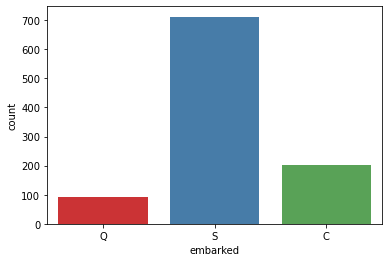

In [5]:
import seaborn as sns

sns.countplot(x=df['embarked'],palette='Set1')
plt.show()

In [6]:
#Replace 'S' for missing embarked values
df['embarked'].fillna('S',inplace=True)

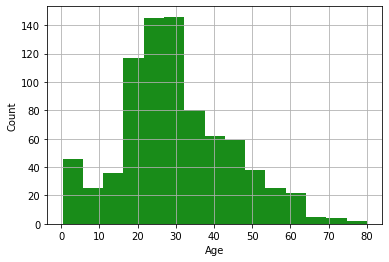

In [7]:
# Visualizing Age vs Survived
age=df['age'].hist(bins=15,color='green',alpha=0.9)
age.set(xlabel='Age',ylabel='Count')
plt.show()

In [8]:
#Since age is right skewed, we use median to fill up the NA values
med_age=df['age'].mean()
print(med_age)

29.838977832512317


In [9]:
df['age'].fillna(med_age,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   object 
 4   age        1009 non-null   float64
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1009 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [11]:
input_cols=['pclass','sex','age','sibsp','parch','fare','embarked']
output_cols=['survived']
columns_to_drop=['name','ticket','cabin','boat','body','home.dest']

In [12]:
df=df.drop(columns_to_drop,axis=1)

In [13]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3.0,0.0,female,29.838978,0.0,0.0,7.750,Q
1,2.0,0.0,male,39.000000,0.0,0.0,26.000,S
2,2.0,1.0,female,40.000000,0.0,0.0,13.000,S
3,3.0,1.0,female,31.000000,1.0,1.0,20.525,S
4,3.0,1.0,female,29.838978,2.0,0.0,23.250,Q


In [14]:
# Labeling Sex as 0 and 1 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])

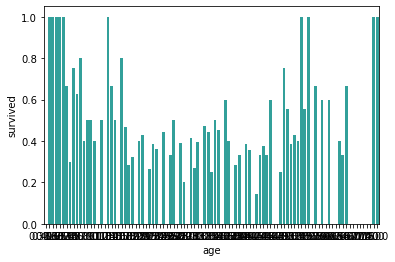

In [15]:
# Visualizing Age and Survival
#plt.figure(figsize=(25,10))
avg_survival_byage = df[["age", "survived"]].groupby(['age'],as_index=False).mean()
g = sns.barplot(x='age', y='survived', data=avg_survival_byage, color="LightSeaGreen")

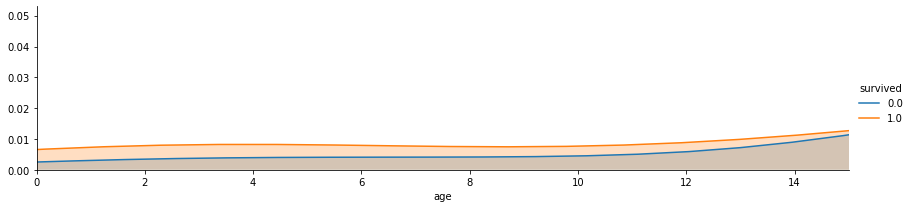

In [19]:
facet = sns.FacetGrid(df,hue="survived",aspect=4)
facet.map(sns.kdeplot,'age',shade=True)
facet.set(xlim=(0,df['age'].max()))
facet.add_legend()
plt.xlim(0,15)
plt.show()

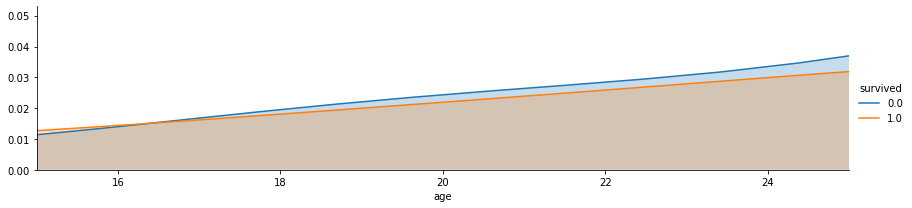

In [20]:
facet = sns.FacetGrid(df,hue="survived",aspect=4)
facet.map(sns.kdeplot,'age',shade=True)
facet.set(xlim=(0,df['age'].max()))
facet.add_legend()
plt.xlim(15,25)
plt.show()

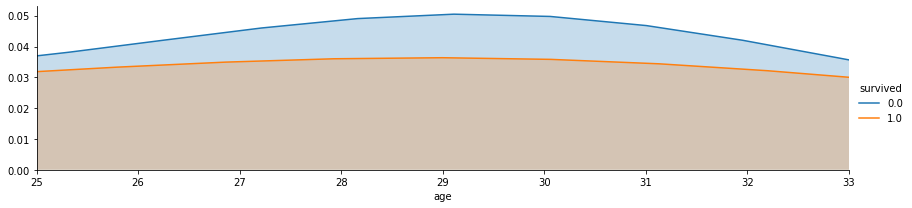

In [21]:
facet = sns.FacetGrid(df,hue="survived",aspect=4)
facet.map(sns.kdeplot,'age',shade=True)
facet.set(xlim=(0,df['age'].max()))
facet.add_legend()
plt.xlim(25,33)
plt.show()

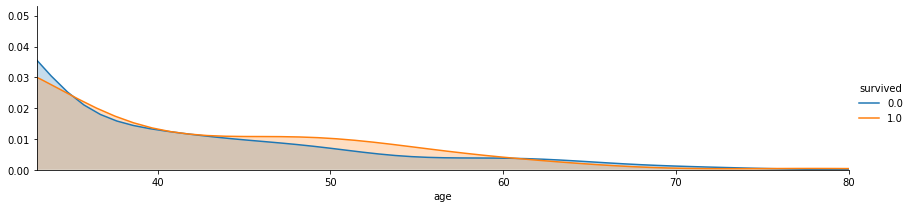

In [22]:
facet = sns.FacetGrid(df,hue="survived",aspect=4)
facet.map(sns.kdeplot,'age',shade=True)
facet.set(xlim=(33,df['age'].max()))
facet.add_legend()
plt.show()

In [23]:
df['isMinor']=np.where(df['age']<16,1,0)

In [24]:
le=LabelEncoder()
df['embarked']=le.fit_transform(df['embarked'])

In [25]:
df.head(20)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,isMinor
0,3.0,0.0,0,29.838978,0.0,0.0,7.7500,1,0
1,2.0,0.0,1,39.000000,0.0,0.0,26.0000,2,0
2,2.0,1.0,0,40.000000,0.0,0.0,13.0000,2,0
3,3.0,1.0,0,31.000000,1.0,1.0,20.5250,2,0
4,3.0,1.0,0,29.838978,2.0,0.0,23.2500,1,0
5,2.0,0.0,1,16.000000,0.0,0.0,26.0000,2,0
6,2.0,0.0,1,43.000000,0.0,1.0,21.0000,2,0
7,1.0,1.0,0,49.000000,0.0,0.0,25.9292,2,0
8,1.0,0.0,1,48.000000,0.0,0.0,50.4958,0,0
9,2.0,0.0,1,29.838978,0.0,0.0,12.8750,2,0


In [26]:
nan_df=df[df.isnull().values.any(axis=1)]

In [27]:
nan_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,isMinor
741,3.0,0.0,1,60.5,0.0,0.0,NaN,2,0


In [28]:
mean_fare=df['fare'].mean()
df['fare'].fillna(mean_fare,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   int32  
 3   age       1009 non-null   float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1009 non-null   float64
 7   embarked  1009 non-null   int32  
 8   isMinor   1009 non-null   int32  
dtypes: float64(6), int32(3)
memory usage: 59.2 KB


In [30]:
X=df[input_cols]
Y=df[output_cols]
Y=np.array(Y).reshape((-1,))
print(X.shape,Y.shape)

(1009, 7) (1009,)


### XGBOOST Classifier

In [31]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [32]:
xgbclass=xgb.XGBClassifier(max_depth=5,learning_rate=0.1,booster='gbtree',n_estimators=100)

In [33]:
xgbclass.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
xgbclass.score(X,Y)

0.8979187314172448

### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [36]:
rf=RandomForestClassifier(n_estimators=100,criterion='entropy')

In [37]:
rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rf.score(X,Y)

0.9702675916749257

###  Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [62]:
gbc=GradientBoostingClassifier(n_estimators=100,max_depth=5)

In [63]:
gbc.fit(X,Y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
y=gbc.predict(X)
print(y.shape)
print(gbc.score(X,Y))

(1009,)
0.9385530227948464


### Best accuracy in "Random Forest" classifier which is causing overfitting of the data
### Using the Gradient Boosting Classifier 

## Generating Predictions on Test Data

In [65]:
test=pd.read_csv('Test.csv')

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     300 non-null    float64
 1   name       300 non-null    object 
 2   sex        300 non-null    object 
 3   age        234 non-null    float64
 4   sibsp      300 non-null    float64
 5   parch      300 non-null    float64
 6   ticket     300 non-null    object 
 7   fare       300 non-null    float64
 8   cabin      66 non-null     object 
 9   embarked   299 non-null    object 
 10  boat       112 non-null    object 
 11  body       23 non-null     float64
 12  home.dest  163 non-null    object 
dtypes: float64(6), object(7)
memory usage: 30.6+ KB


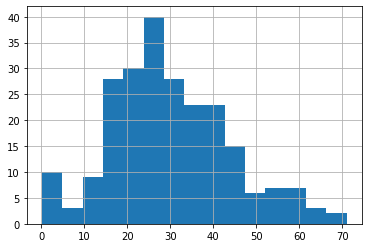

In [67]:
test['age'].hist(bins=15)
plt.show()

In [68]:
test['embarked'].fillna('S',inplace=True)

#Right skewed test data too
med_age_test=test['age'].median()
test['age'].fillna(med_age_test,inplace=True)

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     300 non-null    float64
 1   name       300 non-null    object 
 2   sex        300 non-null    object 
 3   age        300 non-null    float64
 4   sibsp      300 non-null    float64
 5   parch      300 non-null    float64
 6   ticket     300 non-null    object 
 7   fare       300 non-null    float64
 8   cabin      66 non-null     object 
 9   embarked   300 non-null    object 
 10  boat       112 non-null    object 
 11  body       23 non-null     float64
 12  home.dest  163 non-null    object 
dtypes: float64(6), object(7)
memory usage: 30.6+ KB


### Encoding Values now:

In [70]:
le=LabelEncoder()
test['sex']=le.fit_transform(test['sex'])

In [71]:
test['isMinor']=np.where(test['age']<16,1,0)

In [72]:
test['embarked']=le.fit_transform(test['embarked'])

In [73]:
nan_df_test=test[test.isnull().values.any(axis=1)]
nan_df_test.head()
#No NaN Values in required columns

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,isMinor
0,1.0,"Flynn, Mr. John Irwin (""Irving"")",1,36.0,0.0,0.0,PC 17474,26.3875,E25,2,5,NaN,"Brooklyn, NY",0
1,3.0,"Sage, Miss. Constance Gladys",0,28.0,8.0,2.0,CA. 2343,69.5500,NaN,2,NaN,NaN,NaN,0
2,1.0,"Rood, Mr. Hugh Roscoe",1,28.0,0.0,0.0,113767,50.0000,A32,2,NaN,NaN,"Seattle, WA",0
3,2.0,"Gillespie, Mr. William Henry",1,34.0,0.0,0.0,12233,13.0000,NaN,2,NaN,NaN,"Vancouver, BC",0
4,2.0,"Collander, Mr. Erik Gustaf",1,28.0,0.0,0.0,248740,13.0000,NaN,2,NaN,NaN,"Helsinki, Finland Ashtabula, Ohio",0


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     300 non-null    float64
 1   name       300 non-null    object 
 2   sex        300 non-null    int32  
 3   age        300 non-null    float64
 4   sibsp      300 non-null    float64
 5   parch      300 non-null    float64
 6   ticket     300 non-null    object 
 7   fare       300 non-null    float64
 8   cabin      66 non-null     object 
 9   embarked   300 non-null    int32  
 10  boat       112 non-null    object 
 11  body       23 non-null     float64
 12  home.dest  163 non-null    object 
 13  isMinor    300 non-null    int32  
dtypes: float64(6), int32(3), object(5)
memory usage: 29.4+ KB


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   int32  
 3   age       1009 non-null   float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1009 non-null   float64
 7   embarked  1009 non-null   int32  
 8   isMinor   1009 non-null   int32  
dtypes: float64(6), int32(3)
memory usage: 59.2 KB


In [76]:
x_test=test[input_cols]
print(x_test.shape)

(300, 7)


In [77]:
y_test=gbc.predict(x_test)

In [78]:
print(y_test.shape)

(300,)


In [79]:
i=np.arange(0,300)
print(i)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [80]:
data=pd.DataFrame({'Id':i,'survived':y_test})

In [81]:
data.head()

,Id,survived
0,0,1.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [82]:
data.to_csv('TestSubmission.csv',index=False)